In [91]:
import nltk

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("genesis")
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package genesis to
[nltk_data]     C:\Users\moon\AppData\Roaming\nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\moon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\moon\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import base64
import string
import re
import nltk

from collections import Counter
from time import time

# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

#!pip install pywaffle
from pywaffle import Waffle

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("genesis")
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package genesis to
[nltk_data]     C:\Users\moon\AppData\Roaming\nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\moon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\moon\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [112]:
import requests

url = "https://raw.githubusercontent.com/linogaliana/python-datascientist/master/content/NLP/get_data.py"
r = requests.get(url, allow_redirects=True)
open("getdata.py", "wb").write(r.content)

import getdata

train = getdata.create_train_dataframes()

In [113]:
train.head()

Text Author     ID
Id                                                                      
id26305  This process, however, afforded me no means of...    EAP  26305
id17569  It never once occurred to me that the fumbling...    HPL  17569
id11008  In his left hand was a gold snuff box, from wh...    EAP  11008
id27763  How lovely is spring As we looked from Windsor...    MWS  27763
id12958  Finding nothing else, not even gold, the Super...    HPL  12958

In [137]:
train.shape

(19579, 3)

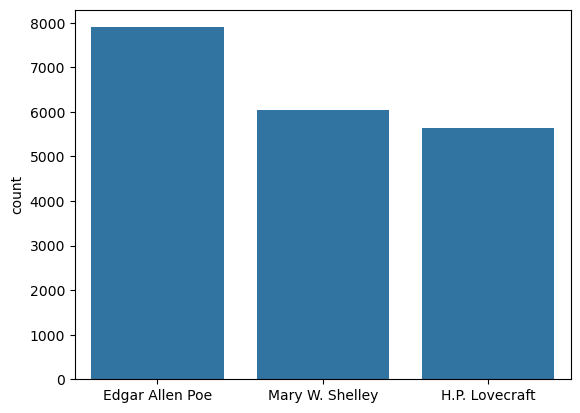

In [116]:
fig = plt.figure()
g = sns.barplot(
    x=["Edgar Allen Poe", "Mary W. Shelley", "H.P. Lovecraft"],
    y=train["Author"].value_counts(),
)

In [117]:
len(train["Text"])

19579

In [118]:
eap = []  # Pour stocker les phrases de Edgar Allan Poe
mws = []  # Pour stocker les phrases de Mary Shelley
hpl = []  # Pour stocker les phrases de H.P. Lovecraft
count = 0  # Compteur pour le nombre total de phrases contenant le mot "fear"


eaph = []  # Pour stocker les phrases de Edgar Allan Poe
mwsh = []  # Pour stocker les phrases de Mary Shelley
hplh = []  # Pour stocker les phrases de H.P. Lovecraft
counth = 0  # Compteur pour le nombre total de phrases contenant le mot "horror"

text = []
for index, row in train.iterrows():  # Itérer sur chaque ligne du DataFrame
    sentence = row["Text"]  # Récupérer le texte de la phrase
    author = row["Author"]  # Récupérer l'auteur de la phrase
    
    if "fear" in sentence:
        count += 1  # Incrémenter le compteur
        
        # Ajouter la phrase à la liste correspondante en fonction de l'auteur
        if author == "EAP":
            eap.append(sentence)
        elif author == "MWS":
            mws.append(sentence)
        elif author == "HPL":
            hpl.append(sentence)

    if "horror" in sentence:
        counth += 1  # Incrémenter le compteur
        
        # Ajouter la phrase à la liste correspondante en fonction de l'auteur
        if author == "EAP":
            eaph.append(sentence)
        elif author == "MWS":
            mwsh.append(sentence)
        elif author == "HPL":
            hplh.append(sentence)

    
    
print("Il y a", count, "phrases où le mot 'fear' apparaît au moins une fois.")
print("Nombre de phrases de EAP contenant 'fear':", len(eap))
print("Nombre de phrases de MWS contenant 'fear':", len(mws))
print("Nombre de phrases de HPL contenant 'fear':", len(hpl))

print("Il y a", counth, "phrases où le mot 'horror' apparaît au moins une fois.")
print("Nombre de phrases de EAP contenant 'fear':", len(eaph))
print("Nombre de phrases de MWS contenant 'fear':", len(mwsh))
print("Nombre de phrases de HPL contenant 'fear':", len(hplh))



Il y a 441 phrases où le mot 'fear' apparaît au moins une fois.
Nombre de phrases de EAP contenant 'fear': 70
Nombre de phrases de MWS contenant 'fear': 211
Nombre de phrases de HPL contenant 'fear': 160
Il y a 222 phrases où le mot 'horror' apparaît au moins une fois.
Nombre de phrases de EAP contenant 'fear': 58
Nombre de phrases de MWS contenant 'fear': 59
Nombre de phrases de HPL contenant 'fear': 105


In [128]:
print(eap)

['I went down to open it with a light heart, for what had I now to fear?', 'They were loud and quick unequal spoken apparently in fear as well as in anger.', 'We occasioned the greatest excitement on board all an excitement greatly relished by ourselves, and especially by our two men, who, now under the influence of a dram of Geneva, seemed resolved to give all scruple, or fear, to the wind.', 'I grew frantically mad, and struggled to force myself upward against the sweep of the fearful scimitar.', 'They were fearfully they were inconceivably hideous; but out of Evil proceeded Good; for their very excess wrought in my spirit an inevitable revulsion.', 'As he bade me good bye, I bethought me that there might be some difficulty in obtaining access to the premises, and mentioned my fears on this point.', 'As the stronger party, however, we overruled their fears, and kept resolutely upon our course.', 'His room was as black as pitch with the thick darkness, for the shutters were close fast

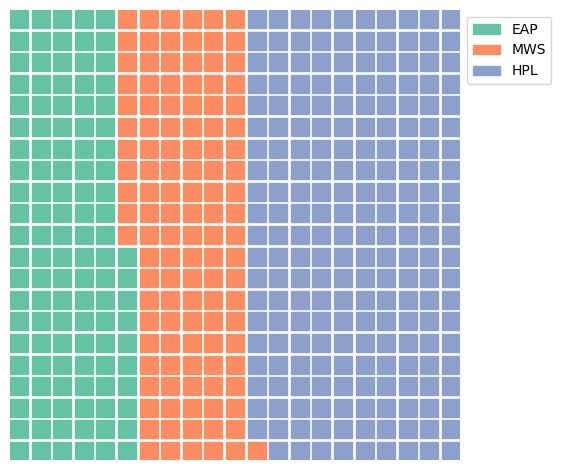

In [119]:
# Définir les données pour le "waffle chart"
data = {'EAP': len(eaph), 'MWS': len(mwsh), 'HPL': len(hplh)}

# Créer un "waffle chart" avec la classe Waffle
fig = plt.figure(
    FigureClass=Waffle,
    rows=21,
    columns=21,
    values=data,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)

# Afficher le graphique
plt.show()

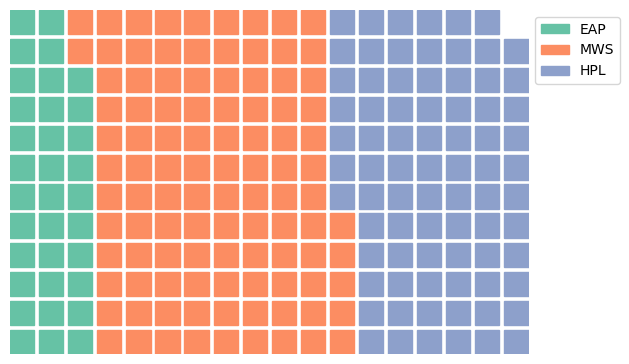

In [120]:
from pywaffle import Waffle

# Définir les données pour le "waffle chart"
data = {'EAP': len(eap), 'MWS': len(mws), 'HPL': len(hpl)}

# Créer un "waffle chart" avec la classe Waffle
fig = plt.figure(
    FigureClass=Waffle,
    rows=12,
    columns=18,
    values=data,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)

# Afficher le graphique
plt.show()

In [101]:
from nltk import sent_tokenize
from nltk import word_tokenize

In [121]:
type(train)

pandas.core.frame.DataFrame

In [132]:
eap_text = []
mws_text = []
hpl_text = []

for index, row in train.iterrows():  # Itérer sur chaque ligne du DataFrame
    sentence = row["Text"]  # Récupérer le texte de la phrase
    auth = row["Author"]  # Récupérer l'auteur de la phrase


    if auth == "EAP":
        eap_text.append(sentence)
    elif auth == "MWS":
        mws_text.append(sentence)
    elif auth == "HPL": 
        hpl_text.append(sentence)

print(eap_text[0:10])
print(mws_text[0:10])
print(hpl_text[0:10])

['This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.', 'In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he took snuff incessantly with an air of the greatest possible self satisfaction.', 'The astronomer, perhaps, at this point, took refuge in the suggestion of non luminosity; and here analogy was suddenly let fall.', 'The surcingle hung in ribands from my body.', "I knew that you could not say to yourself 'stereotomy' without being brought to think of atomies, and thus of the theories of Epicurus; and since, when we discussed this subject not very long ago, I mentioned to you how singularly, yet with how little notice, the vague guesses of that noble Greek had met with confirmation in the late nebular cosmogony, I felt that you could not

In [133]:
text_eap = ' '.join(eap_text)
text_mws = ' '.join(mws_text)
text_hpl = ' '.join(hpl_text)
print(text_eap)
print(text_mws)
print(text_hpl)

This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall. In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he took snuff incessantly with an air of the greatest possible self satisfaction. The astronomer, perhaps, at this point, took refuge in the suggestion of non luminosity; and here analogy was suddenly let fall. The surcingle hung in ribands from my body. I knew that you could not say to yourself 'stereotomy' without being brought to think of atomies, and thus of the theories of Epicurus; and since, when we discussed this subject not very long ago, I mentioned to you how singularly, yet with how little notice, the vague guesses of that noble Greek had met with confirmation in the late nebular cosmogony, I felt that you could not avoid casting

In [135]:
sentences_eap = sent_tokenize(text_eap)
sentences_mws = sent_tokenize(text_mws)
sentences_hpl = sent_tokenize(text_hpl)

len_eap = len(sentences_eap)
len_mws = len(sentences_mws)
len_hpl = len(sentences_hpl)
print(len_eap)
print(len_mws)
print(len_hpl)

8192
6127
5872


In [136]:
total = len_eap + len_mws + len_hpl
print(total)

20191


In [138]:
words_eap = word_tokenize(text_eap)
words_mws = word_tokenize(text_mws)
words_hpl = word_tokenize(text_hpl)
print(len(words_eap))
print(len(words_mws))
print(len(words_hpl))

232119
188826
174007


In [139]:
from nltk.probability import FreqDist

fdist_eap = FreqDist(words_eap)
fdist_mws = FreqDist(words_mws)
fdist_hpl = FreqDist(words_hpl)

fdist_eap.most_common(10)
fdist_mws.most_common(10)
fdist_hpl.most_common(10)

[('the', 10330),
 (',', 8581),
 ('and', 5913),
 ('of', 5802),
 ('.', 5703),
 ('a', 3230),
 ('to', 3223),
 ('I', 2704),
 ('in', 2579),
 ('was', 2181)]

In [140]:
nopunc_eap = []
nopunc_mws = []
nopunc_hpl = []

for w in words_eap:
    if w.isalpha():
        nopunc_eap.append(w.lower())
for w in words_mws:
    if w.isalpha():
        nopunc_mws.append(w.lower())
for w in words_hpl:
    if w.isalpha():
        nopunc_hpl.append(w.lower())

print(nopunc_eap)

print(len(nopunc_eap))

['this', 'process', 'however', 'afforded', 'me', 'no', 'means', 'of', 'ascertaining', 'the', 'dimensions', 'of', 'my', 'dungeon', 'as', 'i', 'might', 'make', 'its', 'circuit', 'and', 'return', 'to', 'the', 'point', 'whence', 'i', 'set', 'out', 'without', 'being', 'aware', 'of', 'the', 'fact', 'so', 'perfectly', 'uniform', 'seemed', 'the', 'wall', 'in', 'his', 'left', 'hand', 'was', 'a', 'gold', 'snuff', 'box', 'from', 'which', 'as', 'he', 'capered', 'down', 'the', 'hill', 'cutting', 'all', 'manner', 'of', 'fantastic', 'steps', 'he', 'took', 'snuff', 'incessantly', 'with', 'an', 'air', 'of', 'the', 'greatest', 'possible', 'self', 'satisfaction', 'the', 'astronomer', 'perhaps', 'at', 'this', 'point', 'took', 'refuge', 'in', 'the', 'suggestion', 'of', 'non', 'luminosity', 'and', 'here', 'analogy', 'was', 'suddenly', 'let', 'fall', 'the', 'surcingle', 'hung', 'in', 'ribands', 'from', 'my', 'body', 'i', 'knew', 'that', 'you', 'could', 'not', 'say', 'to', 'yourself', 'without', 'being', 'bro

In [141]:
from nltk.corpus import stopwords

stopwords = stopwords.words("english")

In [143]:
clean_eap = []
clean_mws = []
clean_hpl = []

for w in nopunc_eap:
    if w not in stopwords:
        clean_eap.append(w)

for w in nopunc_mws:
    if w not in stopwords:
        clean_mws.append(w)

for w in nopunc_hpl:
    if w not in stopwords:
        clean_hpl.append(w)

print(len(clean_eap))

95167


In [145]:
fdist_eap = FreqDist(clean_eap)

fdist_eap.most_common(10)

[('one', 491),
 ('could', 490),
 ('old', 392),
 ('would', 367),
 ('man', 279),
 ('like', 273),
 ('seemed', 272),
 ('night', 255),
 ('time', 238),
 ('things', 238)]

In [146]:
fdist_mws = FreqDist(clean_mws)

fdist_mws.most_common(10)

[('one', 477),
 ('would', 475),
 ('could', 383),
 ('life', 334),
 ('yet', 318),
 ('love', 273),
 ('us', 272),
 ('raymond', 270),
 ('might', 269),
 ('heart', 265)]

In [147]:
fdist_hpl = FreqDist(clean_hpl)

fdist_hpl.most_common(10)

[('one', 491),
 ('could', 490),
 ('old', 392),
 ('would', 367),
 ('man', 279),
 ('like', 273),
 ('seemed', 272),
 ('night', 255),
 ('time', 238),
 ('things', 238)]

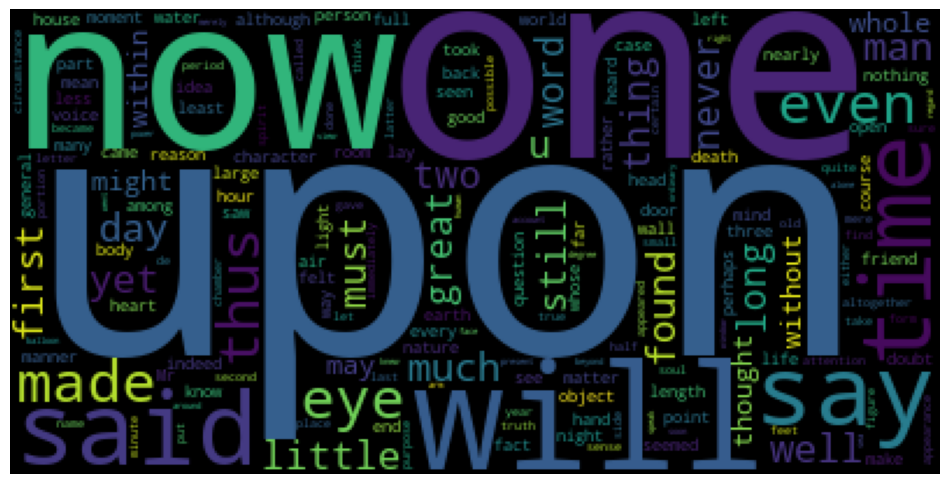

In [148]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(text_eap)

plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

plt.axis("off")
plt.show()

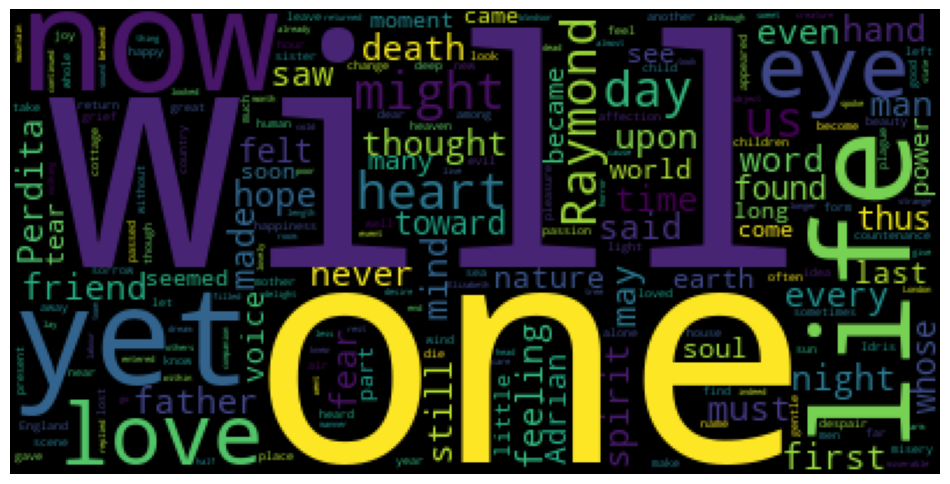

In [149]:
wordcloud = WordCloud().generate(text_mws)

plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

plt.axis("off")
plt.show()

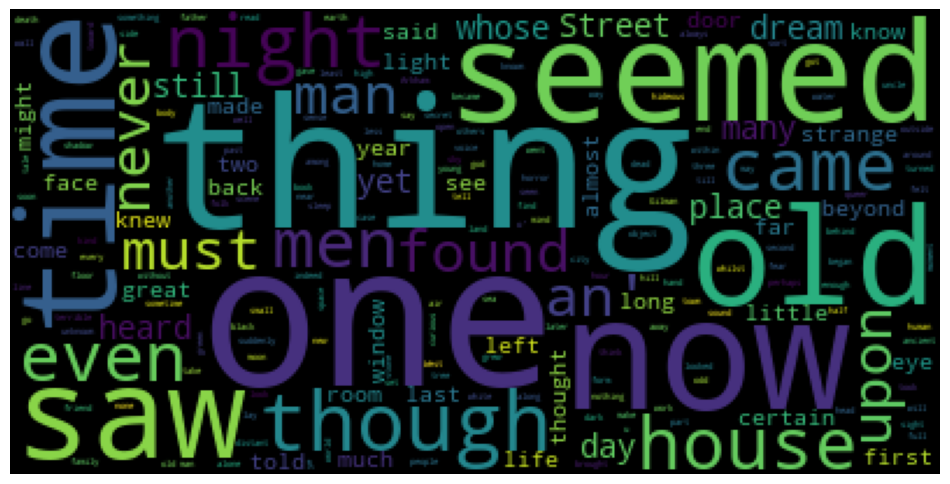

In [150]:
wordcloud = WordCloud().generate(text_hpl)

plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

plt.axis("off")
plt.show()

In [151]:
count_words = pd.DataFrame(
    {
        "counter": train.groupby("Author")
        .apply(lambda s: " ".join(s["Text"]).split())
        .apply(lambda s: Counter(s))
        .apply(lambda s: s.most_common())
        .explode()
    }
)
count_words[["word", "count"]] = pd.DataFrame(
    count_words["counter"].tolist(), index=count_words.index
)
count_words = count_words.reset_index()

count_words = count_words.assign(
    tot_mots_auteur=lambda x: (x.groupby("Author")["count"].transform("sum")),
    freq=lambda x: x["count"] / x["tot_mots_auteur"],
    rank=lambda x: x.groupby("Author")["count"].transform("rank", ascending=False),
)

C:\Users\moon\AppData\Local\Temp\ipykernel_12128\3895838104.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda s: " ".join(s["Text"]).split())


In [153]:
from plotnine import *

g = (
    ggplot(count_words)
    + geom_point(aes(y="freq", x="rank", color="Author"), alpha=0.4)
    + scale_x_log10()
    + scale_y_log10()
    + theme_minimal()
)

In [154]:
import statsmodels.api as sm

exog = sm.add_constant(np.log(count_words["rank"].astype(float)))

model = sm.GLM(
    count_words["freq"].astype(float), exog, family=sm.families.Poisson()
).fit()

# Afficher les résultats du modèle
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   freq   No. Observations:                69301
Model:                            GLM   Df Residuals:                    69299
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23.011
Date:                Wed, 17 Apr 2024   Deviance:                     0.065676
Time:                        15:37:34   Pearson chi2:                   0.0656
No. Iterations:                     5   Pseudo R-squ. (CS):          0.0002431
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4388      1.089     -2.239      0.0

In [155]:
from nltk.stem import WordNetLemmatizer

lemm = WordNetLemmatizer()

for word in ["women", "daughters", "leaves"]:
    print(f"The lemmatized form of {word} is: {lemm.lemmatize(word)}")

The lemmatized form of women is: woman
The lemmatized form of daughters is: daughter
The lemmatized form of leaves is: leaf


In [156]:
import nltk

nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\moon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\moon\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True